# SVD (Singular Value Decomposition)

**Singular-Value Decomposition**, or **SVD** for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

In this notebook, we explore how SVD can be used in Image compression.

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

In [2]:
vmin = 0
vmax = 1
image_bias = 1

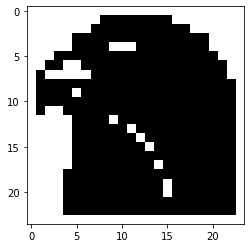

In [3]:
img = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0],
[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
[0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
[0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])
plt.imshow(image_bias-img, cmap='gray', vmin=vmin, vmax=vmax)

In [4]:
def plot_svd(A):
    #n = len(A)
    n = 8 ## Using the first 8 rank-1 matrices to represent the image
    plt.imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
    U, S, V = svd(A)

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
        
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=45)
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U,S,V

## Combining the first $k$ components 


This cell helps visualize the effect of representing the original image as the sum of $k$ (=8 in this example) Rank-1 matrices. During image compression, we can choose 'k' to be very high to get a reasonably lossless representation of the image, or very low to achieve a higher compression.

The first row of images represent the outer product of the $i$-th component of the SVD, whereas the second row shows the final image, obtained upon combining each of the components.

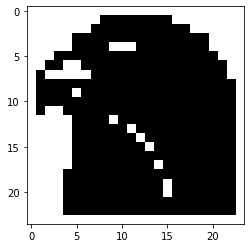

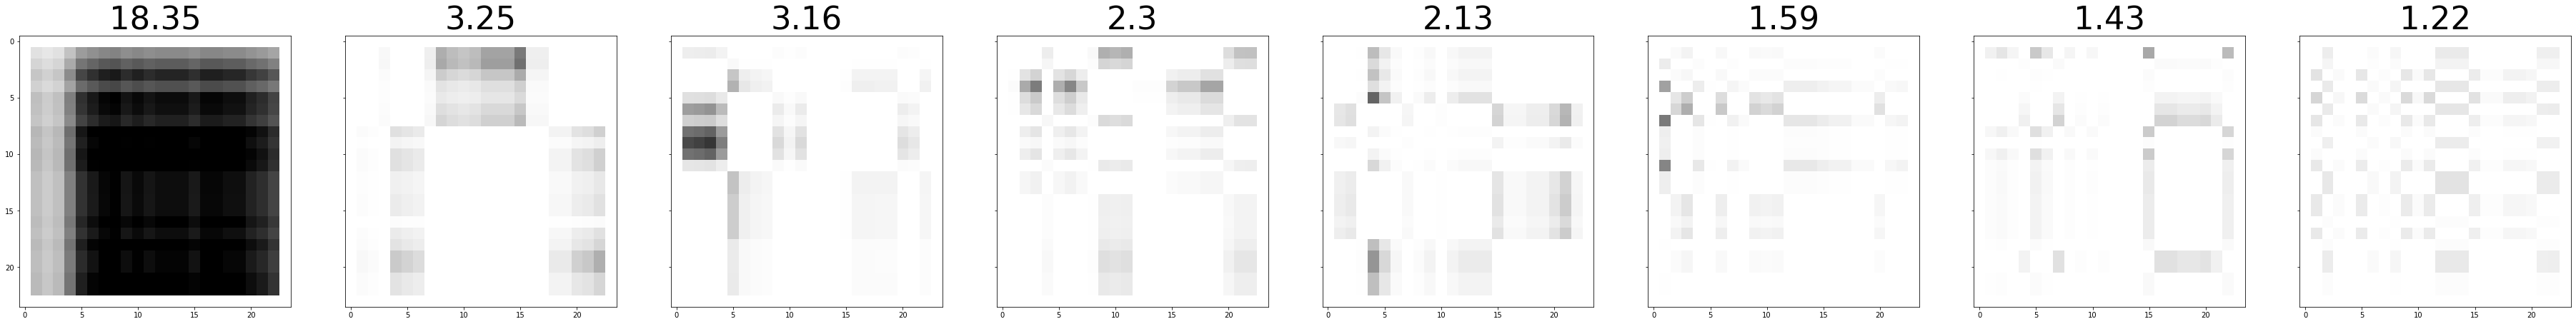

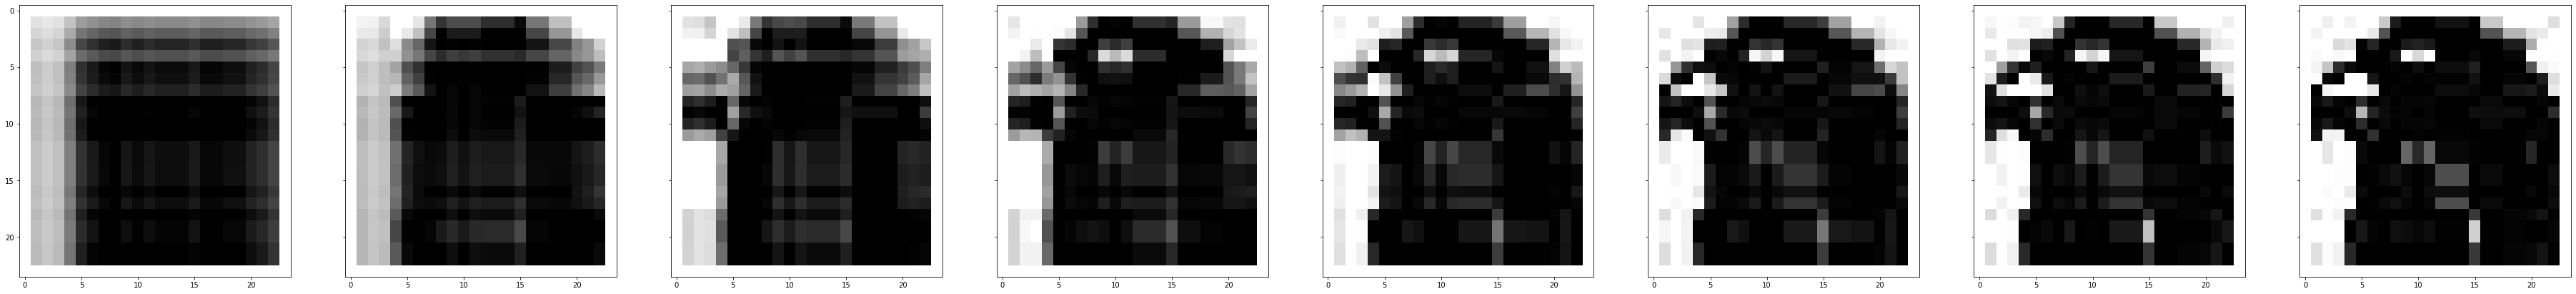

In [5]:
U,S,V = plot_svd(img)

In [6]:
print("Original image shape:", img.shape)
print(f"U: {U.shape} || S: {S.shape} || V: {V.shape}")

Original image shape: (24, 24)
U: (24, 24) || S: (24,) || V: (24, 24)
